# Synthetic Model 

Notebook to generate a set of models.

#### Import libraries

In [1]:
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism
from fatiando.gravmag import sphere, prism, polyprism
from mpl_toolkits.mplot3d import Axes3D

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'synthetic_model.ipynb'

#### Black background figures

In [3]:
plt.style.use('classic')

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as func

#### Loading 2D grid properties

In [6]:
with open('data/regular_grid.pickle') as f:
        regular = pickle.load(f)

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### List of saved files

In [8]:
saved_files = []

### Observation area

In [9]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (regular['area'][1], regular['area'][0],regular['area'][3],regular['area'][2])

Area limits: 
 x_max = 5000.0 m 
 x_min = -5000.0 m 
 y_max = 5000.0 m 
 y_min = -5000.0 m


## Regional Field

In [10]:
inc_gf , dec_gf = (40.,45.) 

## Create a simple model w/ the presence of Remanence Magnetization in a sphere 

In [11]:
model_sphere_remanent = dict()

#### Main field

In [12]:
model_sphere_remanent['main_field'] = (inc_gf,dec_gf)

#### Magnetization of a sphere

In [13]:
model_sphere_remanent['m_R'] = 15.
model_sphere_remanent['inc_R'] = 60.
model_sphere_remanent['dec_R'] = 10.

mag_tot = ang2vec(model_sphere_remanent['m_R'],
                  model_sphere_remanent['inc_R'],
                  model_sphere_remanent['dec_R'])

model_sphere_remanent['magnetization'] = mag_tot

In [14]:
model_sphere_remanent['magnetization_sph_coord'] = vec2ang(mag_tot)

#### Sphere position and dimension

In [15]:
model_sphere_remanent['xc'] = 0.
model_sphere_remanent['yc'] = 0.
model_sphere_remanent['zc'] = 2000.
model_sphere_remanent['radius'] = 1500.

In [16]:
model_sphere_remanent['model'] = [Sphere(model_sphere_remanent['xc'],
                                         model_sphere_remanent['yc'],
                                         model_sphere_remanent['zc'],
                                         model_sphere_remanent['radius'],
                                         {'magnetization':mag_tot})]

#### Generating .pickle file

In [17]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_sphere_remanent['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [18]:
file_name = 'data/model_sphere_remanent.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_sphere_remanent, f)
    
saved_files.append(file_name)

In [19]:
for r in model_sphere_remanent:
    print r, ':', model_sphere_remanent[r]

magnetization_sph_coord : [15.0, 59.999999999999993, 9.9999999999999982]
magnetization : [  7.38605815   1.30236133  12.99038106]
xc : 0.0
yc : 0.0
main_field : (40.0, 45.0)
zc : 2000.0
dec_R : 10.0
radius : 1500.0
inc_R : 60.0
m_R : 15.0
model : [<fatiando.mesher.Sphere object at 0x7f7c94f3f350>]
metadata : Generated by synthetic_model.ipynb on 05 December 2018 20:04:13 UTC


## Create a simple model w/ Induced Magnetization in a sphere 

In [20]:
model_sphere_induced = dict()

#### Main field

In [21]:
model_sphere_induced['main_field'] = (inc_gf,dec_gf)

#### Magnetization of a sphere

In [22]:
model_sphere_induced['m_I'] = 15.
model_sphere_induced['inc_I'] = inc_gf
model_sphere_induced['dec_I'] = dec_gf

mag_tot = ang2vec(model_sphere_induced['m_I'],model_sphere_induced['inc_I'],model_sphere_induced['dec_I'])

model_sphere_induced['magnetization'] = mag_tot

In [23]:
model_sphere_induced['magnetization_sph_coord'] = vec2ang(mag_tot)

#### Sphere position and dimension

In [24]:
model_sphere_induced['xc'] = 0.
model_sphere_induced['yc'] = 0.
model_sphere_induced['zc'] = 2000.
model_sphere_induced['radius'] = 1500.

In [25]:
model_sphere_induced['model'] = [Sphere(model_sphere_induced['xc'],model_sphere_induced['yc'],model_sphere_induced['zc'],model_sphere_induced['radius'],{'magnetization':mag_tot})
]

## Visualization of the model

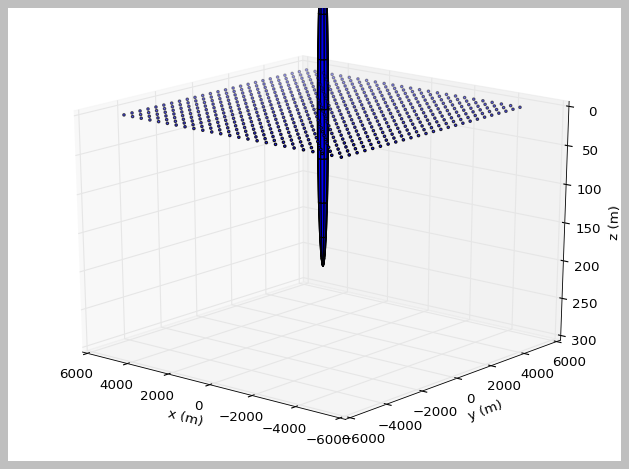

In [26]:
plt.close('all')
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

# Coordinates points
ax.scatter3D(regular['x'],regular['y'],regular['z'],c= 'b',marker='.' )


# Plotting the sphere model
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 200. * np.outer(np.cos(u), np.sin(v))
y = 200. * np.outer(np.sin(u), np.sin(v))
z = 200. * np.outer(np.ones(np.size(u)), np.cos(v)) 


#labels
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlim(0,300)
ax.set_zlabel('z (m)')

ax.plot_surface(x, y, z, color='b')

#visualization angle
ax.view_init(200, 50)

plt.tight_layout(True)

#plt.savefig('figures/3dmodel_eq.jpg', dpi=300)

plt.show()

#### Generating .pickle file

In [27]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_sphere_induced['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [28]:
file_name = 'data/model_sphere_induced.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_sphere_induced, f)
    
saved_files.append(file_name)

In [29]:
for r in model_sphere_induced:
    print r, ':', model_sphere_induced[r]

magnetization_sph_coord : [14.999999999999998, 39.999999999999993, 45.0]
m_I : 15.0
magnetization : [ 8.12512831  8.12512831  9.64181415]
dec_I : 45.0
yc : 0.0
main_field : (40.0, 45.0)
inc_I : 40.0
zc : 2000.0
radius : 1500.0
xc : 0.0
model : [<fatiando.mesher.Sphere object at 0x7f7c94f3f310>]
metadata : Generated by synthetic_model.ipynb on 05 December 2018 20:04:13 UTC


#### Saved files

In [30]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  data/model_sphere_remanent.pickle
2  data/model_sphere_induced.pickle
